# Explainable Loan Granting

## Data Exploration

In [36]:
import pandas as pd
import numpy as np
import utils

In [37]:
df = pd.read_csv("./datasets/train.csv")
df.head(10)

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236            12329.362860    59   
1   1450153         3609          11940            12191.996920    59   
2   1969101        28276           9311            21603.224550    59   
3   6651430        11170           6954            17877.155850    59   
4  14354669        16890          13226            13539.926670    59   
5  50509046        34631          30203             8635.931613    36   
6  32737431        30844          19773            15777.511830    59   
7  63151650        20744          10609             7645.014802    58   
8   4279662         9299          11238            13429.456610    59   
9   4431034        19232           8962             7004.097481    58   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   
5     BAT4694572      17.246986     B        G5                RENT  ...   
6     BAT4808022      10.731432     C        C5                RENT  ...   
7     BAT2558388      13.993688     A        A5                 OWN  ...   
8     BAT5341619      11.178457     G        C2            MORTGAGE  ...   
9     BAT2078974       5.520413     C        B5                RENT  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.498291                0.793724                            0   
1     2.377215                0.974821                            0   
2     4.316277                1.020075                            0   
3     0.107020                0.749971                            0   
4  1294.818751                0.368953                            0   
5     5.043575                0.581688                            0   
6     3.167937                0.553076                            0   
7     0.098448                0.047589                            0   
8     0.530214                0.216985                            0   
9     2.912215                0.886864                            0   

  Application Type  Last week Pay  Accounts Delinquent  \
0       INDIVIDUAL             49                    0   
1       INDIVIDUAL            109                    0   
2       INDIVIDUAL             66                    0   
3       INDIVIDUAL             39                    0   
4       INDIVIDUAL             18                    0   
5       INDIVIDUAL             32                    0   
6       INDIVIDUAL             71                    0   
7       INDIVIDUAL             87                    0   
8       INDIVIDUAL            144                    0   
9       INDIVIDUAL              9                    0   

   Total Collection Amount  Total Current Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   
5                       42                  51252   
6                     3388                  42069   
7                       48                 184909   
8                       26                  68126   
9                       35                  71650   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2                         26155            0  
3                         60214            0  
4                         22579            0  
5                         27480            0  
6                         31068   

In [38]:
df.describe(include='all')

ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count   6.746300e+04  67463.000000   67463.000000            67463.000000   
unique           NaN           NaN            NaN                     NaN   
top              NaN           NaN            NaN                     NaN   
freq             NaN           NaN            NaN                     NaN   
mean    2.562761e+07  16848.902776   15770.599114            14621.799323   
std     2.109155e+07   8367.865726    8150.992662             6785.345170   
min     1.297933e+06   1014.000000    1014.000000             1114.590204   
25%     6.570288e+06  10012.000000    9266.500000             9831.684984   
50%     1.791565e+07  16073.000000   13042.000000            12793.682170   
75%     4.271521e+07  22106.000000   21793.000000            17807.594120   
max     7.224578e+07  35000.000000   34999.000000            34999.746430   

                Term Batch Enrolled  Interest Rate  Grade Sub Grade  \
count   67463.000000          67463   67463.000000  67463     67463   
unique           NaN             41            NaN      7        35   
top              NaN     BAT3873588            NaN      C        B4   
freq             NaN           3626            NaN  19085      4462   
mean       58.173814            NaN      11.846258    NaN       NaN   
std         3.327441            NaN       3.718629    NaN       NaN   
min        36.000000            NaN       5.320006    NaN       NaN   
25%        58.000000            NaN       9.297147    NaN       NaN   
50%        59.000000            NaN      11.377696    NaN       NaN   
75%        59.000000            NaN      14.193533    NaN       NaN   
max        59.000000            NaN      27.182348    NaN       NaN   

       Employment Duration  ...    Recoveries Collection Recovery Fee  \
count                67463  ...  67463.000000            67463.000000   
unique                   3  ...           NaN                     NaN   
top               MORTGAGE  ...           NaN                     NaN   
freq                 36351  ...           NaN                     NaN   
mean                   NaN  ...     59.691578                1.125141   
std                    NaN  ...    357.026346                3.489885   
min                    NaN  ...      0.000036                0.000036   
25%                    NaN  ...      1.629818                0.476259   
50%                    NaN  ...      3.344524                0.780141   
75%                    NaN  ...      5.453727                1.070566   
max                    NaN  ...   4354.467419              166.833000   

       Collection 12 months Medical Application Type  Last week Pay  \
count                  67463.000000            67463   67463.000000   
unique                          NaN                2            NaN   
top                             NaN       INDIVIDUAL            NaN   
freq                            NaN            67340            NaN   
mean                       0.021301              NaN      71.163260   
std                        0.144385              NaN      43.315845   
min                        0.000000              NaN       0.000000   
25%                        0.000000              NaN      35.000000   
50%                        0.000000              NaN      68.000000   
75%                        0.000000              NaN     105.000000   
max                        1.000000              NaN     161.000000   

        Accounts Delinquent  Total Collection Amount  Total Current Balance  \
count               67463.0             67463.000000           6.746300e+04   
unique                  NaN                      NaN                    NaN   
top                     NaN                      NaN                    NaN   
freq                    NaN                      NaN                    NaN   
mean                    0.0               146.467990           1.595739e+05   
std                     0.0         

In [39]:
utils.show_class_distr(df['Loan Status'])

[61222, 6241]


The distribution of the two classes is strongly imbalanced, there is approximately one `Defaulter` for each 10 `Not Defaulter` 

## Features Engineering

Check if there are any missing values

In [40]:
df.isnull().values.any()

False

Removing the `ID` feature because it's useless.

In [41]:
df = df.drop('ID',axis = 1)

Check if there are categorical features that need to be turned into numerical values

In [42]:
categoricalFeatures = []

for i in df.select_dtypes(include=["object"]):
    categoricalFeatures.append(i)

print(categoricalFeatures)

['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']


For each feature, check the cardinality.

In [43]:
for categoricalFeature in categoricalFeatures:
    print(f"{categoricalFeature} :\t{len(df[categoricalFeature].unique())}")

Batch Enrolled :	41
Grade :	7
Sub Grade :	35
Employment Duration :	3
Verification Status :	3
Payment Plan :	1
Loan Title :	109
Initial List Status :	2
Application Type :	2


`Payment Plan` has only one value in all the dataset, so it is useless and can be removed:

In [44]:
df = df.drop('Payment Plan',axis = 1)
categoricalFeatures.remove('Payment Plan')

#### Convert categorical features into numerical ones

Turning the categorical features into numerical ones using *Ordinal Encoding*

In [45]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df_categorical = df[categoricalFeatures]
enc.fit(df_categorical)

# disabling the warning
pd.options.mode.chained_assignment = None
df_categorical[categoricalFeatures] = enc.transform(df_categorical)

df = df.drop(categoricalFeatures,axis=1)
df = df.join(df_categorical)


# Split the data into training and test sets

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan Status',axis=1)
y = df['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y)

# Feature Selection


Compute the correlation matrix, and check if there are any pair of features that are correlated

In [47]:
cor_matrix = X_train.corr(numeric_only=True).abs()

# The correlation matrix is huge to visualize, it's better to check in a different way
#
# Create a triangular matrix of boolean the keep only the upper triangular part 
# of the matrix without the diagonal!
upper_tri_bool = np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)
upper_tri = cor_matrix.where(upper_tri_bool)
# check for values grater than 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

print(to_drop)

[]


There are not any pair of features that are correlated: nothing to drop.

# Feature Normalization

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

zscore = MinMaxScaler()
zscore.fit(X_train)
X_train_sc = zscore.transform(X_train)
X_test_sc = zscore.transform(X_test)


Check if there are features with low variance

In [49]:
from sklearn.feature_selection import VarianceThreshold

# Remove the quasi-static features
vthresh = VarianceThreshold(threshold=0.005)
selector = vthresh.fit(X_train_sc)
selected = vthresh.get_support()

print("features with low variance : ")
concol = [column for column in X_train.columns 
          if column not in X_train.columns[selected]]

for feature in concol:
    print(feature)

features with low variance : 
Collection Recovery Fee
Accounts Delinquent
Total Collection Amount
Application Type


Removing the features with variance under the chosen threshold

In [51]:
for feature in concol:
   X_train = X_train.drop(feature,axis=1)
   X_test = X_test.drop(feature,axis=1)

In [52]:
# Re-scaling the train and test sets after the features were removed
zscore = MinMaxScaler()
zscore.fit(X_train)
X_train = zscore.transform(X_train)
X_test = zscore.transform(X_test)

## Filter feature selection: mutual information test

The 10 most relevant features according to the mutual information supervised test applied on the training set are kept.

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


fs = SelectKBest(score_func=mutual_info_classif, k=10)
fs.fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

## Baseline test

In [54]:
from sklearn.metrics import classification_report, log_loss
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

print(classification_report(y_test, y_hat,zero_division=0))
print(f"log loss: {log_loss(y_test, y_hat)}")

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20203
           1       0.00      0.00      0.00      2060

    accuracy                           0.91     22263
   macro avg       0.45      0.50      0.48     22263
weighted avg       0.82      0.91      0.86     22263

log loss: 3.3351267116552727


The dataset used is heavily imbalanced: it is much more likely that an input sample is labeled as "Non-defaulter" than "Defaulter". This, in turn, means that aimed choices have to be made to tackle this imbalance and to have a model that performs well, starting from the evaluation metric used. 
Relying on the ***accuracy score*** would be an error, since it is defined as:
$$Accuracy=\frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}$$


To deal with the imbalance, a pipeline is built using an UnderSampler and a Classifier. In this way, the training is done on a dataset which is not imbalanced anymore.

In [55]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

sampler = RandomUnderSampler()
clf = LogisticRegression()
pipeline = Pipeline([('sampler', sampler), ('classifier', clf)])
pipeline.fit(X_train,y_train)
y_hat = pipeline.predict(X_test)

print(classification_report(y_test, y_hat))
print(f"log loss: {log_loss(y_test, y_hat)}")

              precision    recall  f1-score   support

           0       0.91      0.52      0.66     20203
           1       0.10      0.50      0.16      2060

    accuracy                           0.52     22263
   macro avg       0.50      0.51      0.41     22263
weighted avg       0.83      0.52      0.61     22263

log loss: 17.423608578074777


## Metric Selection

For the purpose of this project it is crucial that the final model is able to identify the defaulters. This means that rather than focusing only on the accuracy, we want to minimize the number of "False Non-Defaulters". 
For this reason, an custom evaluation metric that considers the **accuracy** and the **recall of the Defaulter** is preferrable.
We decided to implement the **harmonic mean** :
$$HM=2\times\frac{accuracy\times recall_{Defaulter}}{accuracy + recall_{Defaulter}} $$
Using this metric, will led the grid search to prefer models that have both minimum values of "False Non-Defaulters" and a good accuracy.


In [56]:
from sklearn.metrics import recall_score, make_scorer, balanced_accuracy_score

# Define the custom scoring function
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred, pos_label=1)
    accuracy = balanced_accuracy_score(y_true,y_pred)
    return   2 * (recall*accuracy)/(recall+accuracy)

# Create the custom scorer
custom_scorer = make_scorer(custom_score, greater_is_better=True)

## Models

#### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf1 = {}
clf1['classifier'] = RandomForestClassifier()
clf1['name'] = 'RandomForestClassifier'

param = {}
param['classifier__n_estimators'] = [50, 100, 250]
param['classifier__max_depth'] = [2, 5, 10]
param['classifier__class_weight'] = ['balanced']
clf1['params'] = param

#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

clf2 = {}
clf2['classifier'] = LogisticRegression()
clf2['name'] = 'LogisticRegression'

param = {}
param['classifier__penalty'] = ['l2']
param['classifier__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

clf2['params'] = param

#### Support Vector Machine

In [59]:
from sklearn.svm import SVC

clf3 = {}
clf3['classifier'] = SVC()
clf3['name'] = 'SVMClassifier'

param = {}
param['classifier__probability'] = [True]
param['classifier__C'] = [0.001, 0.1, 10]
param['classifier__kernel'] = ['poly', 'rbf', 'sigmoid']
param['classifier__gamma']=['auto']
clf3['params'] = param

#### Gradient Boosting

In [60]:
from xgboost import XGBClassifier

clf4 = {}
clf4['classifier'] = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
clf4['name'] = 'XGBClassifier'

param = {}
param['classifier__max_depth'] = [4,8]
param['classifier__n_estimators'] = [100,200,400]
param['classifier__learning_rate'] = [0.1, 0.01]
clf4['params'] = param

## Grid Search

The following code run a grid search with all the classifiers and hyper-parameters. 
Depending on the scoring metric we want to select the best model, please modify the `scoring` parameter :
- `'balanced_accurasy'` to use the **balanced accuracy**
- `custom_scorer` to use the scorer defined above

In [61]:
%%time
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from joblib import load, dump

try :
    best_model = load('./joblib_models/best_model.joblib')
except:
    classifiers = [clf1,clf2,clf3,clf4]
    sampler = ClusterCentroids()

    names = [clf['name'] for clf in classifiers ]
    parameters = [clf['params'] for clf in classifiers ]
    classifiers = [clf['classifier'] for clf in classifiers ]

    gs = utils.GS(X_train,y_train,names,classifiers,parameters,scoring='balanced_accuracy',sampler=sampler,verbose=3)
    best_model = gs.best_estimator_
    predict_proba = gs.predict_proba
    
    dump(best_model,'./joblib_models/best_model.joblib')


Starting Grid Search..
Scoring metrics : balanced_accuracy
Classifiers : RandomForestClassifier, LogisticRegression, SVMClassifier, XGBClassifier
Running classifier : RandomForestClassifier
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Francesca\anaconda3\envs\malis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best params :  {'classifier__class_weight': 'balanced', 'classifier__max_depth': 2, 'classifier__n_estimators': 250}
Test score  :  0.5042706628413868
Running classifier : LogisticRegression
Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\Users\Francesca\anaconda3\envs\malis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best params :  {'classifier__C': 10, 'classifier__penalty': 'l2'}
Test score  :  0.5000710385787809
Running classifier : SVMClassifier
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Francesca\anaconda3\envs\malis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best params :  {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly', 'classifier__probability': True}
Test score  :  0.49901584509353974
Running classifier : XGBClassifier
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Francesca\anaconda3\envs\malis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best params :  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 8, 'classifier__n_estimators': 200}
Test score  :  0.5010687264581329

The best model is RandomForestClassifier with score 0.5042706628413868
CPU times: total: 1h 1min 20s
Wall time: 2h 32min 55s


In [62]:

y_hat = best_model.predict(X_test)
print(classification_report(y_test,y_hat))
print(f"log loss: {log_loss(y_test,y_hat)}")

              precision    recall  f1-score   support

           0       0.91      0.31      0.46     20203
           1       0.09      0.69      0.16      2060

    accuracy                           0.35     22263
   macro avg       0.50      0.50      0.31     22263
weighted avg       0.83      0.35      0.44     22263

log loss: 23.548261175255305


## Confusion Matrix

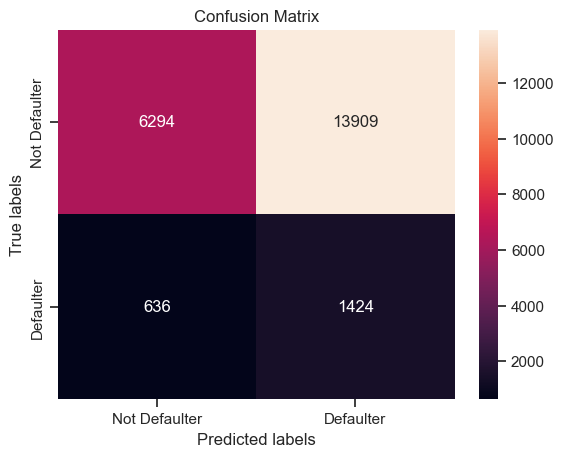

In [63]:
utils.show_confusion_matrix(y_test,y_hat)

## Novelty Detection

Trying with kernel : linear


[3182, 3059]
Trying with kernel : poly


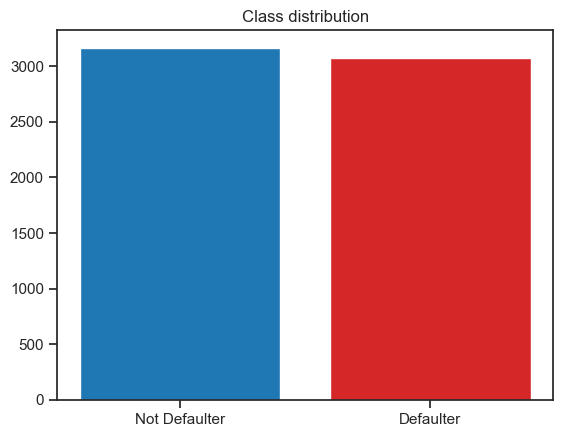

[3166, 3075]
Trying with kernel : rbf


[3060, 3181]
Trying with kernel : sigmoid


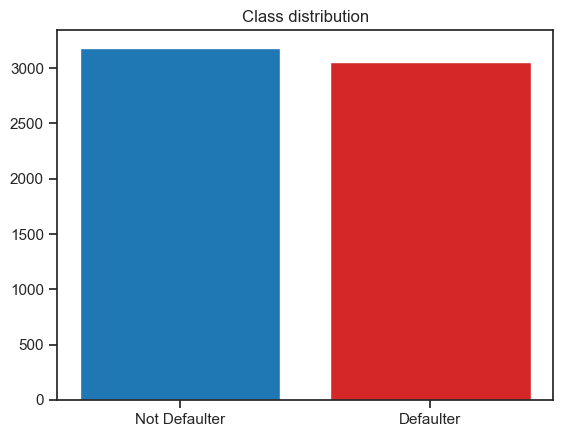

[3184, 3057]
CPU times: total: 23min 2s
Wall time: 23min 5s


In [65]:
%%time
from sklearn.svm import OneClassSVM

def map_func(x) :
    if x == -1 :
        return 1
    if x == 1 :
        return 0

vfunc = np.vectorize(map_func)

kernels = ['linear','poly','rbf','sigmoid']

Defaulters = df[df['Loan Status']==1].drop('Loan Status',axis=1)
NotDefaulters = df[df['Loan Status']==0].drop('Loan Status',axis=1)

for kernel in kernels : 
    print("="*100)
    print(f"Trying with kernel : {kernel}")
    try :
        clf = load(f"./joblib_models/oneClassCVM_{kernel}.joblib")
    except :
        clf = OneClassSVM(kernel=kernel)
        clf.fit(NotDefaulters)
        dump(clf,f"./joblib_models/oneClassCVM_{kernel}.joblib")

    y_hat = clf.predict(Defaulters)
    utils.show_class_distr(vfunc(y_hat))


## Scatter Matrix

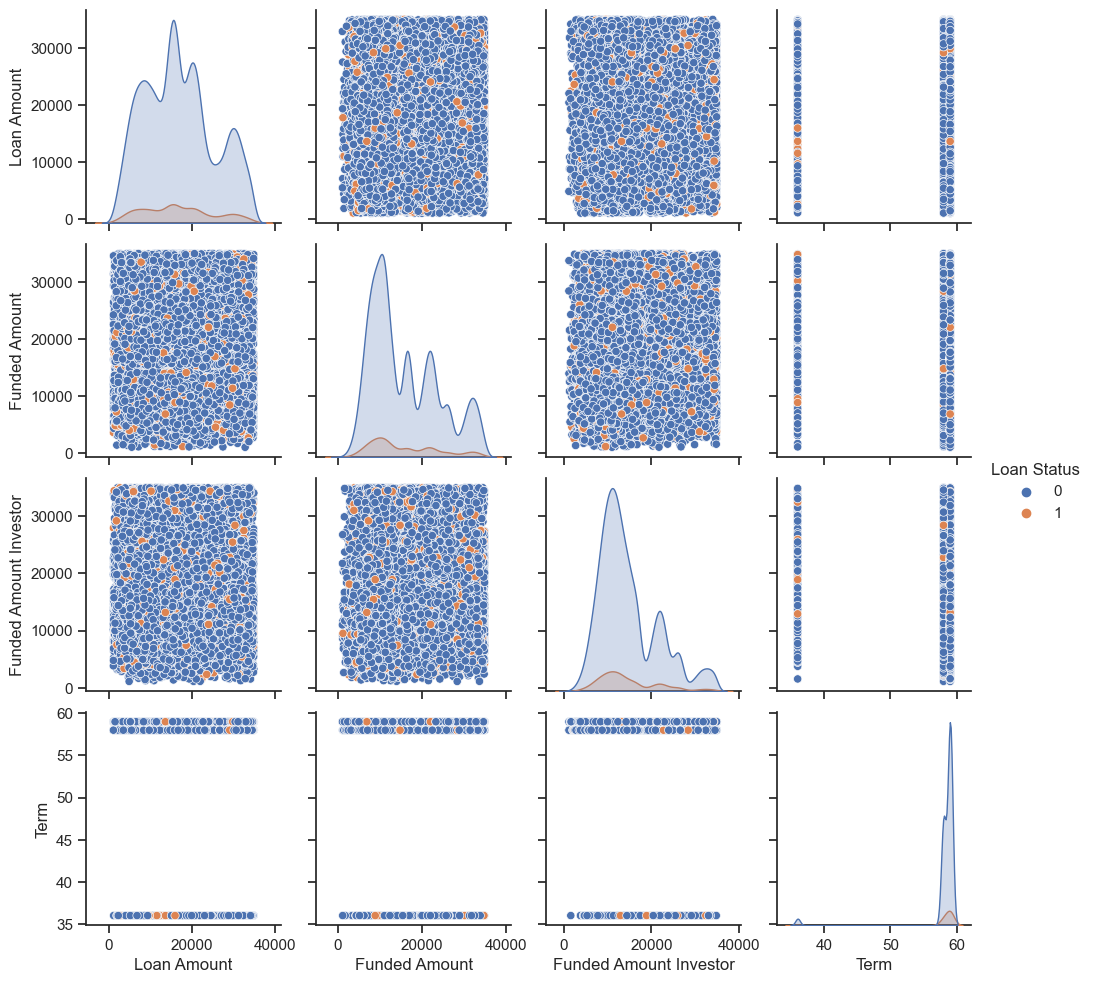

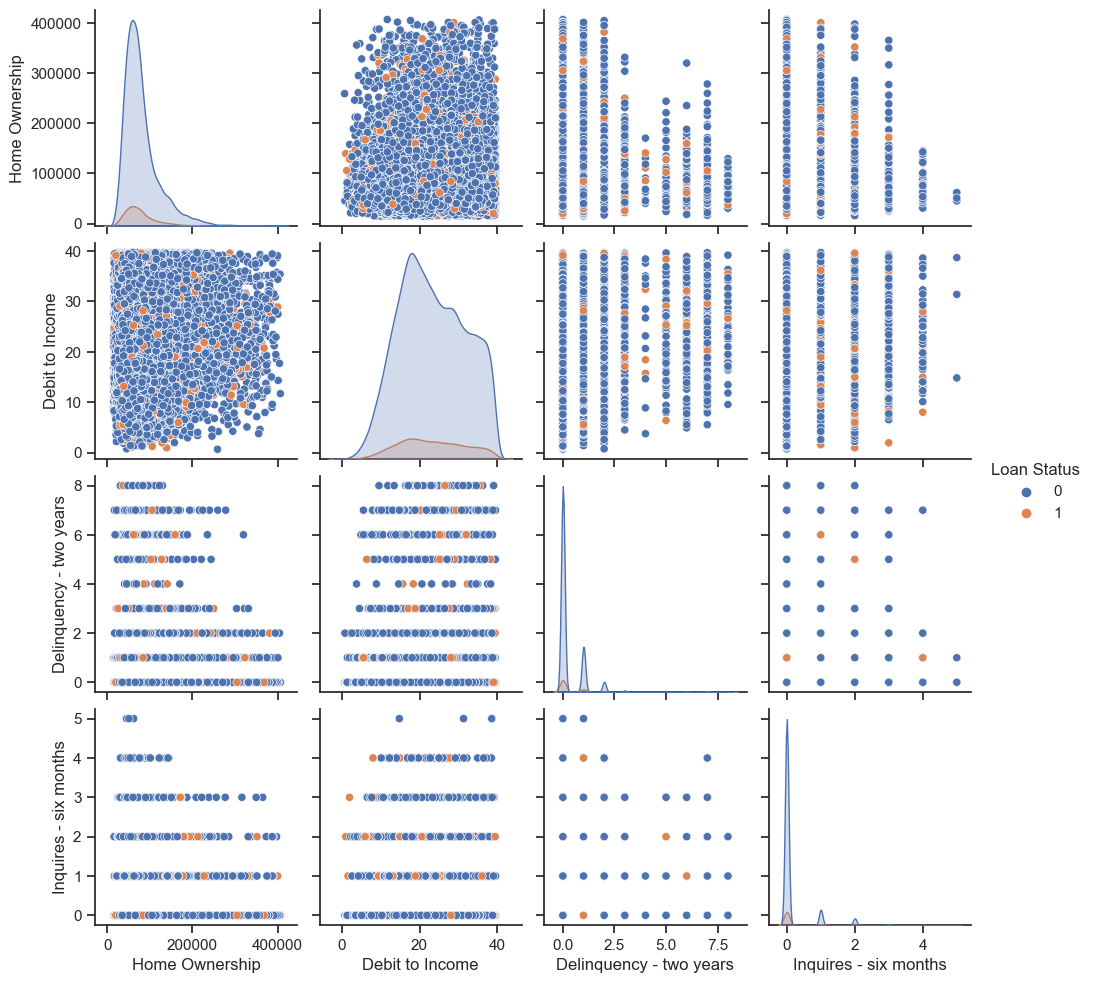

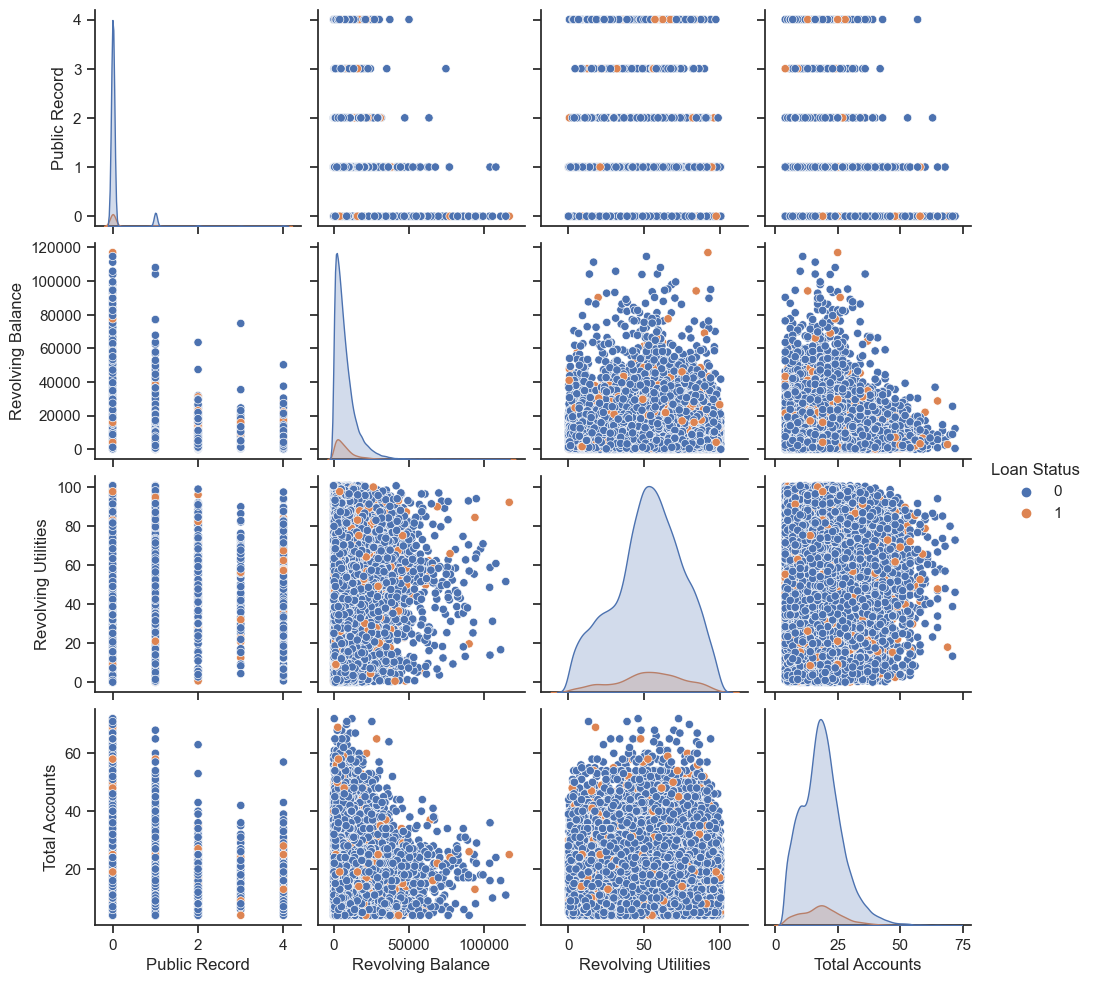

In [66]:
utils.show_scatter_matrix(df)

## Explainable Model

In [67]:
import lime
from lime import lime_tabular
from lime_stability.stability import LimeTabularExplainerOvr

select the model

In [68]:
model = best_model

### Create a tabular explainer object
It expects the following parameters:
- training_data – our training data generated with train/test split. It must be in a Numpy array format.
- feature_names – column names from the training set
- class_names – distinct classes from the target variable
- mode – type of problem you’re solving (classification in this case)

In [69]:
explainer = LimeTabularExplainerOvr(
    training_data=X_train,
    feature_names=df.drop('Loan Status',axis=1).columns,
    class_names=['Non-defaulter', 'Defaulter'],
    mode='classification'
)

Set the parameters to be used in the explain_instance method

In [70]:
i = 25

params = {"data_row": X_test[i],
          "predict_fn": predict_proba,
          "num_samples": 5000,
          "num_features": 6,
          "distance_metric": "euclidean"}

In [71]:
exp = explainer.explain_instance(**params)

In [72]:
# True label of the i-th test sample
print(list(y_test)[i])

0


In [73]:
exp.show_in_notebook(show_table=True)

In [74]:
exp.as_list()

[('Inquires - six months <= 0.35', 0.1461504855587381),
 ('Term <= 0.00', 0.11160063189368678),
 ('0.96 < Funded Amount <= 1.00', 0.01425236793845027),
 ('0.35 < Loan Amount <= 0.50', 0.011262488671710032),
 ('Delinquency - two years <= 0.50', -0.0049409810871579255),
 ('Home Ownership <= 0.17', 0.004068827405699875)]

### Evaluating LIME Stability


VSI (Variables Stability Index) and CSI (Coefficients Stability Index) are employed.

In [75]:
csi, vsi = explainer.check_stability(n_calls=10,**params,index_verbose=False)
print("CSI: ",csi,"\nVSI: ",vsi,"\n")    

CSI:  100.0 
VSI:  91.48 

